# 01. Importing libraries to perform EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
from collections import defaultdict
warnings.filterwarnings('ignore')

# 02. Creating the dataframe using sklearn `make_blobs` dataset

In [2]:
data = make_blobs(n_samples = 10000, n_features = 3, centers = 5)

# note the above data is a tuple of array

# the first array is a 3d feature array which we're capturing in the following dataframe
print('First Array in a 3D feature')
print(data[0])
print('\n')

# the next array is an array of labels which we'll use later to compare our clusters with the actuals
print('Next Array in a 3D feature')
print(data[1])

print('\n\nDataframe')
df=pd.DataFrame(data[0],columns=['x','y','z'])
df

First Array in a 3D feature
[[ 1.26542945 -1.26005102  4.95987442]
 [ 2.67367802  2.67165494 10.00863735]
 [ 2.39850823 -1.31290997  6.83638553]
 ...
 [ 5.4822862  -2.06946013 -2.91097007]
 [-6.11856329  9.19907167 -8.66820061]
 [ 0.81526232 -2.29409858  5.51546348]]


Next Array in a 3D feature
[0 4 0 ... 2 3 0]


Dataframe


,x,y,z
0,1.265429,-1.260051,4.959874
1,2.673678,2.671655,10.008637
2,2.398508,-1.312910,6.836386
3,1.708908,-1.534121,6.366830
4,0.865800,-1.074788,5.896254
...,...,...,...
9995,6.497224,-5.693344,2.088566
9996,3.818010,3.780164,6.455603
9997,5.482286,-2.069460,-2.910970
9998,-6.118563,9.199072,-8.668201


# 03. Visualizing the above dataframe

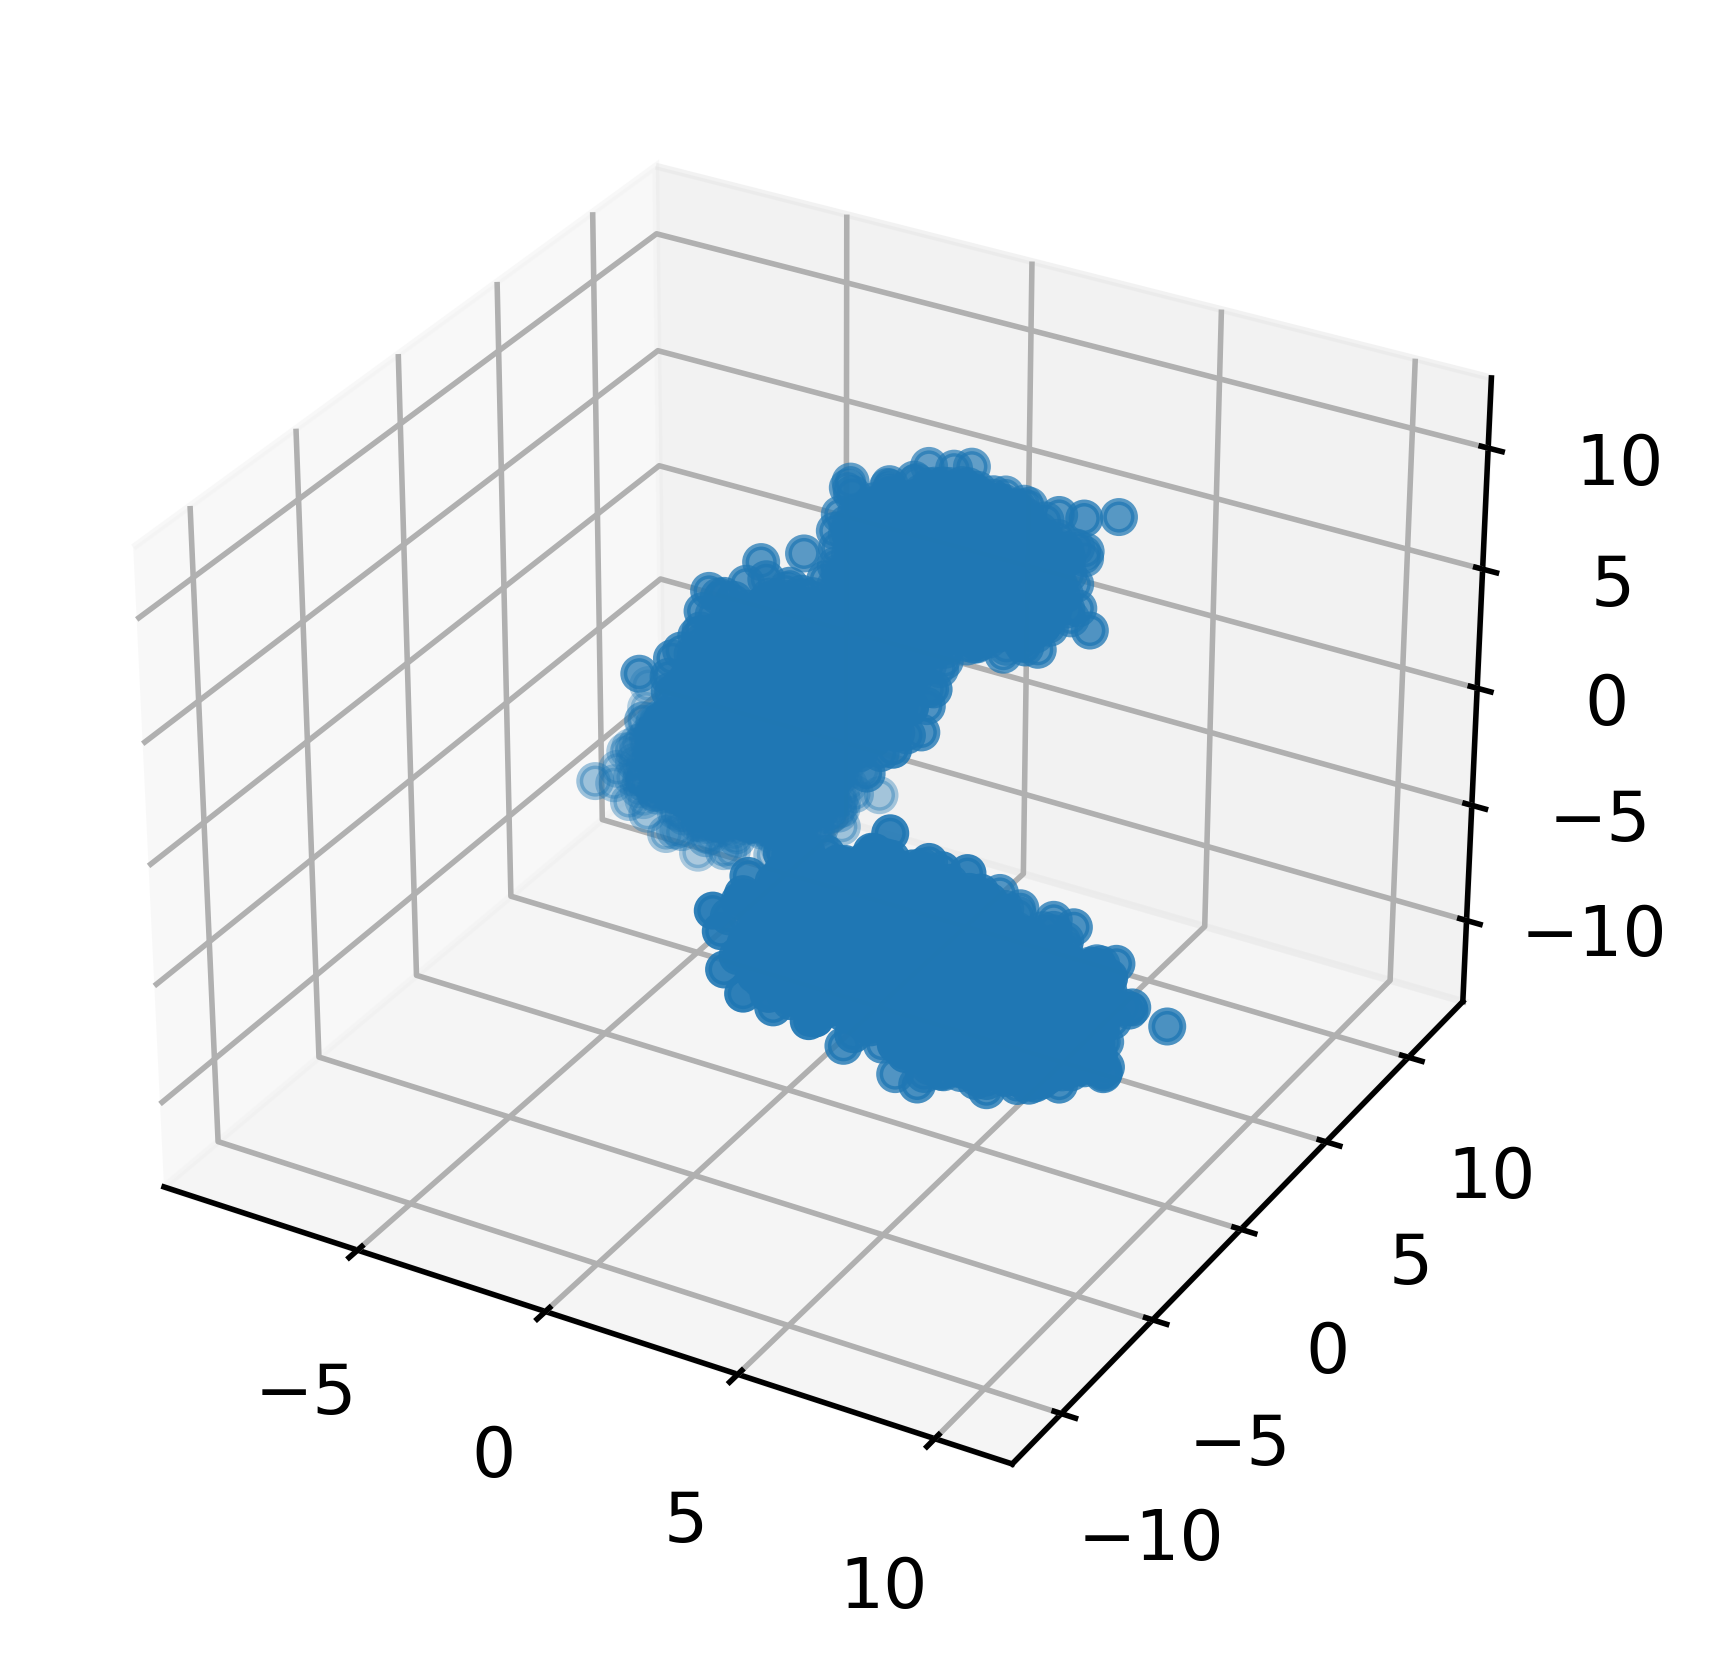

In [3]:
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
ax.scatter(df.x, df.y, df.z);

# 04. Creating a `Euclidean distance` metric which is required to `assign` an appropriate `cluster` for each of the `data points`

In [4]:
def dist(pt1,pt2):
    if type(pt1)!=type(np.array([1])) or type(pt2)!=type(np.array([1])):
        pt1,pt2=np.array(pt1),np.array(pt2)
    return np.sqrt(((pt1-pt2)**2).sum())

# 05. K-Means Clustering Algorithm

Here we are writing the main algorithm to cluster the given datapoints


In [5]:
def kmeans(k,data,itr,thres):
    
    # choosing k rabdom datapoints to initialize the means
    means=data.sample(k).values
    count=0
    compare=[]
    
    # outer while loop to control the no of iterations using count
    while count<itr:
        count+=1
        
        # initializing hash table to assign the cluster to each data point
        mean_dict=defaultdict(list)
        for point in data.values:
            tmp=None
            mindist=float('inf')
            
            for mean in means:
                # finding the distance between the point under consideration 
                # and the centroids of previously formed clusters
                d=dist(mean,point)
                
                if d<mindist:
                    # capturing the closest centroid for the given point 
                    mindist=d
                    tmp=mean
                    
            # assiging the datapoint to the closest cluster
            mean_dict[str(tmp)].append(list(point))
        
        means=[]
        for mean in mean_dict:
            # optimizing the centroids by taking the mean of all the points in a particular cluster as its new centroid
            means.append(list(np.array(mean_dict[mean]).mean(axis=0)))
        compare.append(np.array(means))
        
        # checking for convergence of centroid for early stopping
        if len(compare)>1 and dist(compare[-1],compare[-2])<thres:
            print(f'The algorithm converged in {count} iterations')
            return means
    return means

In [6]:
mu=kmeans(5,df,1000,10**-4)
print(f'\nThe centroids of k-clusters are {mu}')

The algorithm converged in 33 iterations

The centroids of k-clusters are [[0.7074340863737206, -1.8902594893440572, 4.97702286454606], [2.647370368502324, 3.2408753119750884, 7.657811439610123], [1.6412805141086295, -1.1721970433737303, 6.129576993705163], [-5.529689846896652, 8.673121032657576, -8.050220921822811], [6.40732905925648, -5.331980528607138, -1.5330011311750262]]


Here we're creating a function called coloring which assigns unique integer values for each datapoint based on the cluster it is belonging to. We're going to use `.apply()` method and finally use scatterplot to visualize the clusters.

In [7]:
def coloring(point1,point2,point3):
    mindist=float('inf')
    ans=None
    point=[point1,point2,point3]
    for i,pt in enumerate(mu):
        if dist(pt,point)<mindist:
            mindist=dist(pt,point)
            ans=i
    return ans

In [8]:
# derived column called color
df['color']=df.apply(lambda df: coloring(df.x,df.y,df.z),axis=1)

In [9]:
mu=np.array(mu)

## 06. visualizing the given dataset based on the clusters created using k-means clustering algorithm

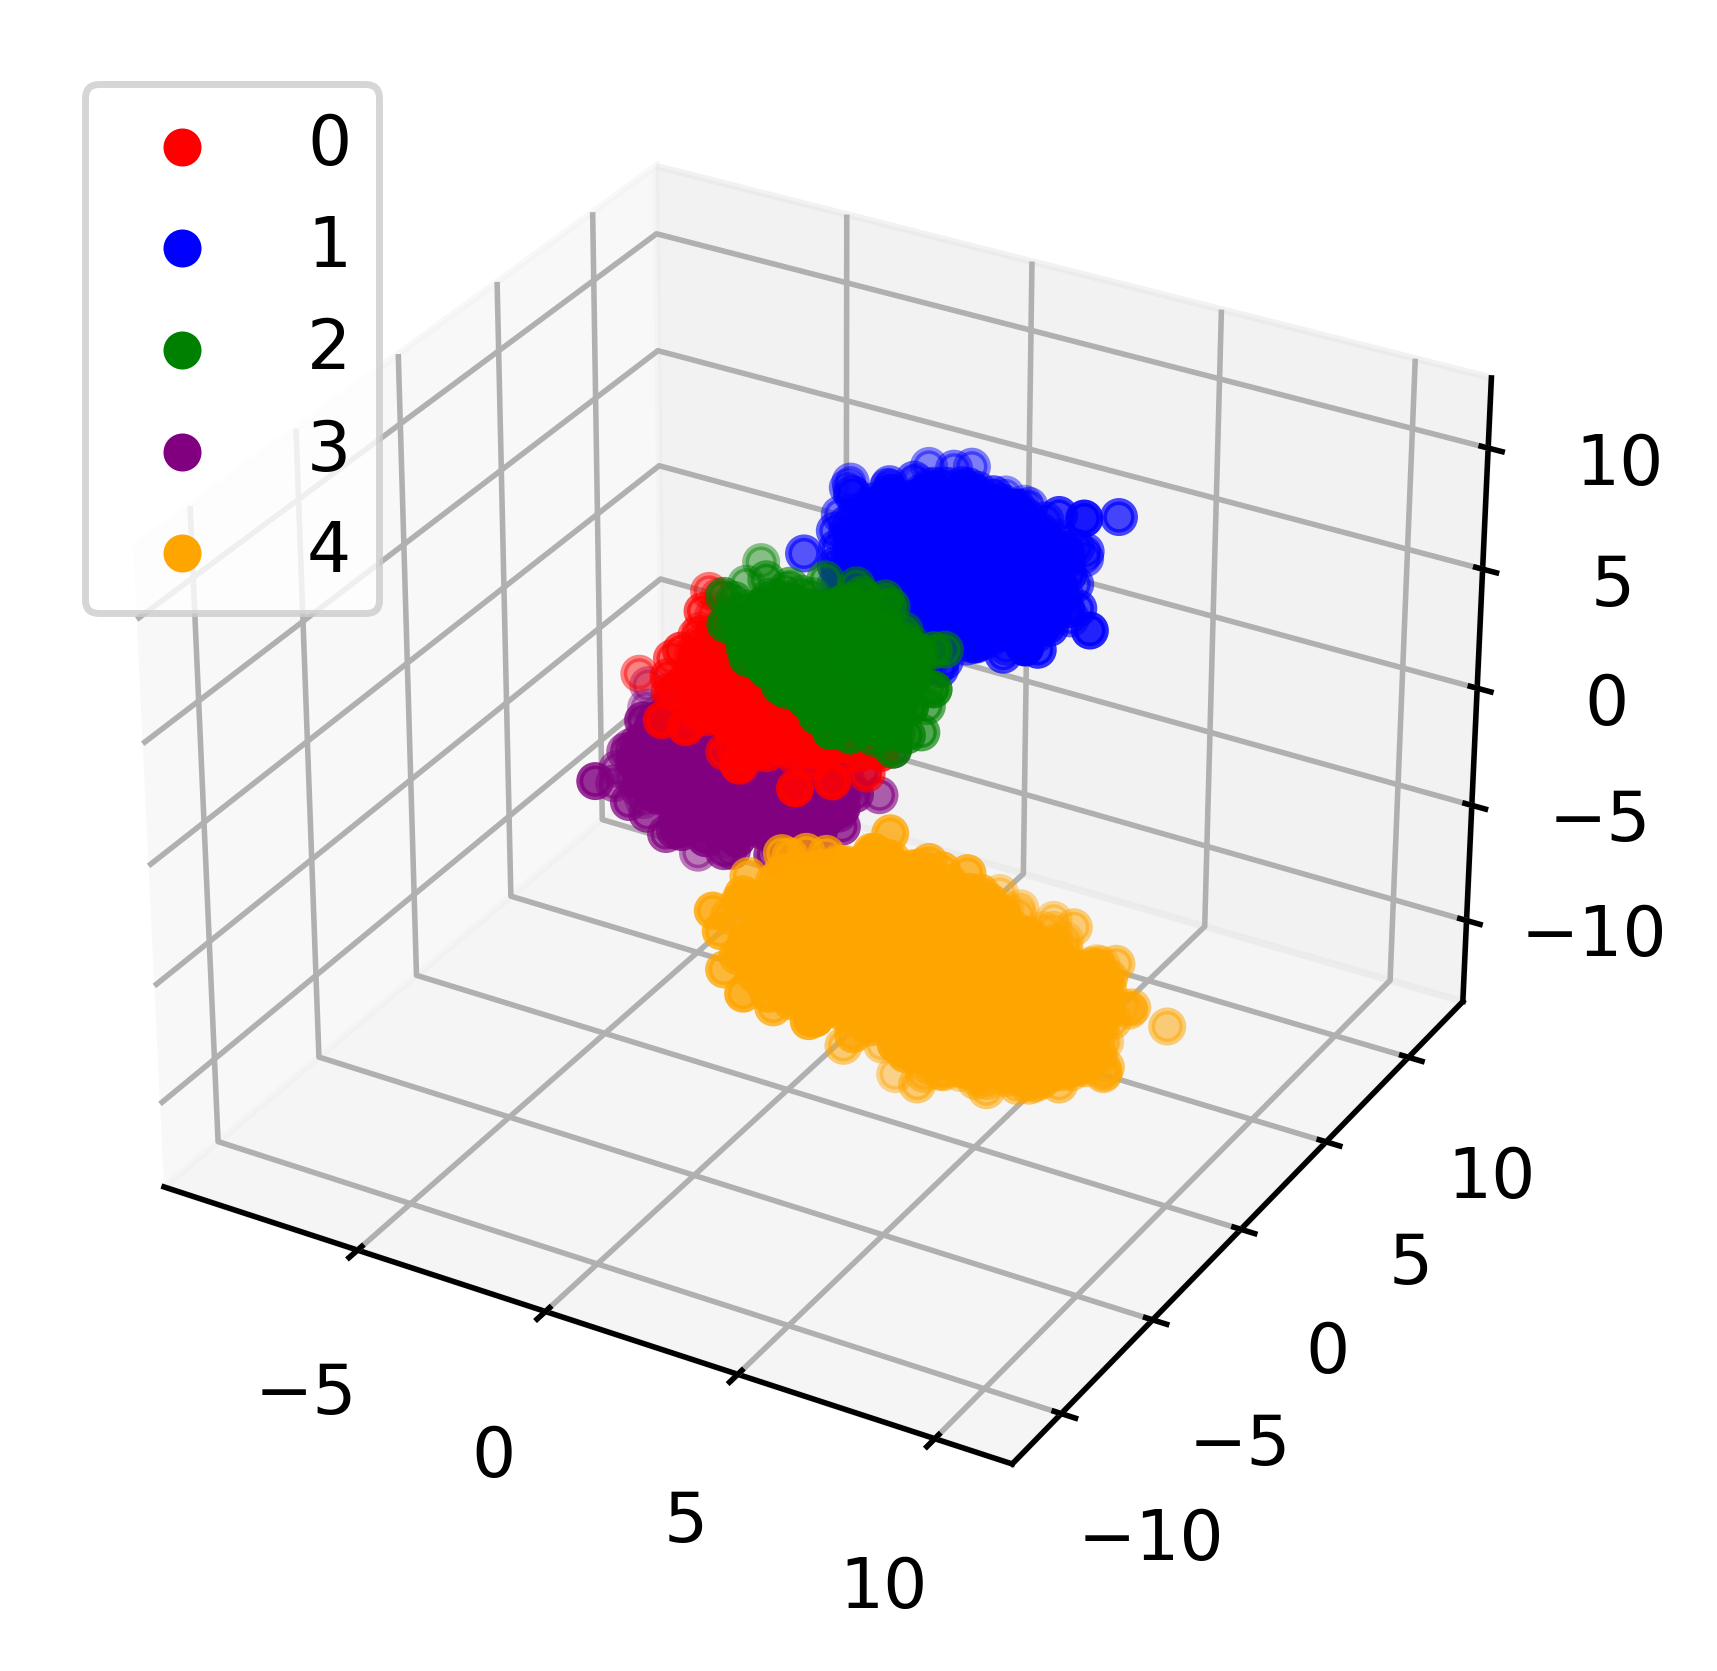

In [10]:
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')
k=5
for i in range(k):
    dt=df[df.color==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

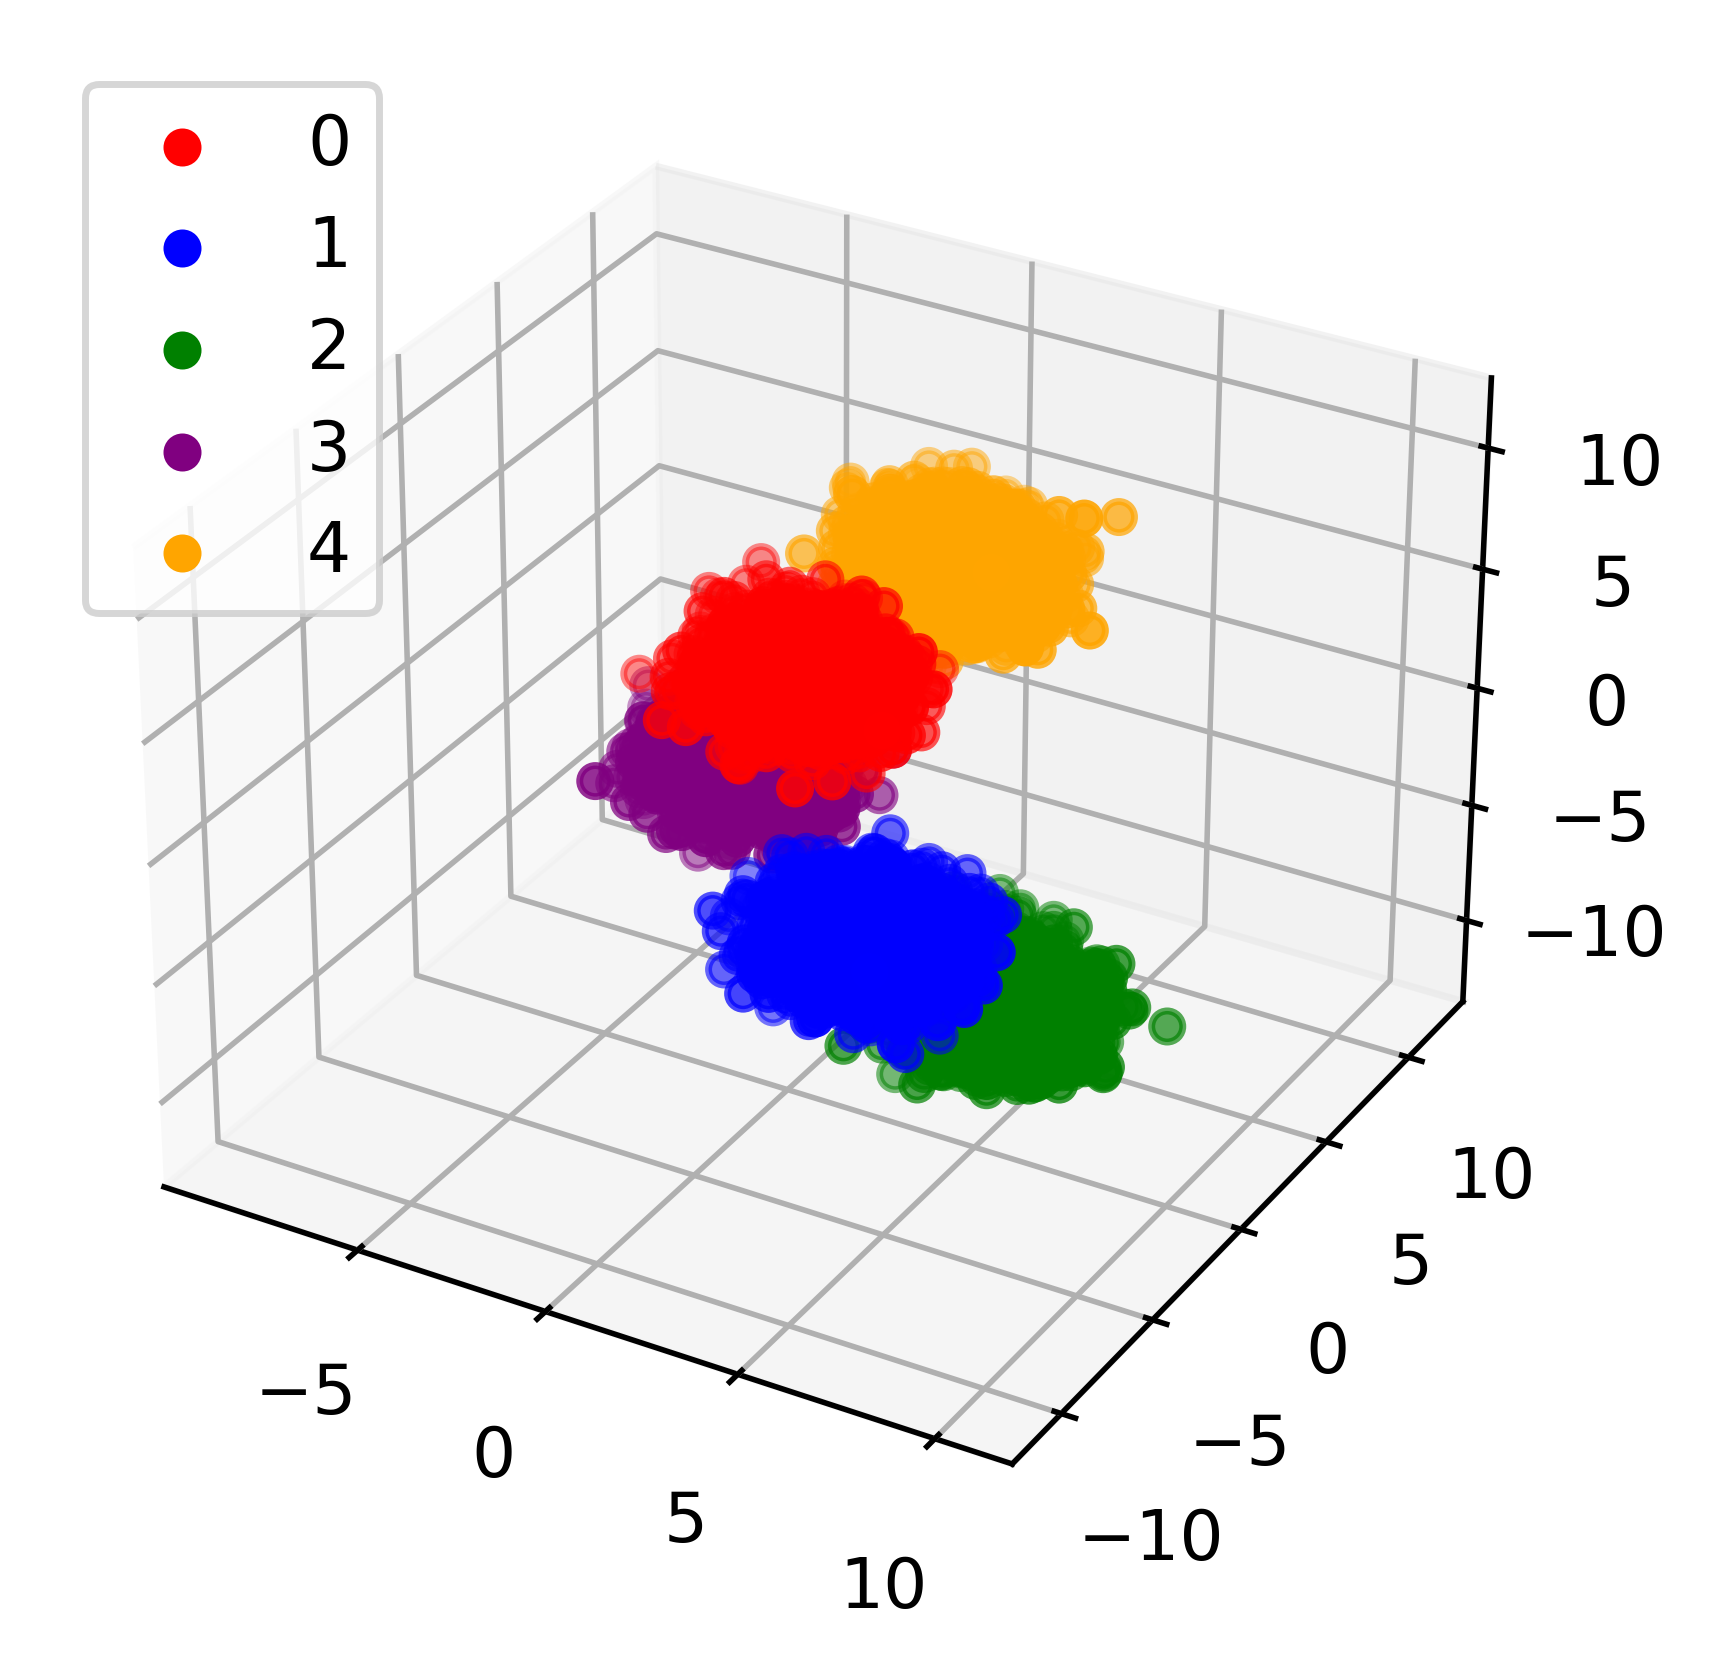

In [11]:
# visualizing the original dataset using the actual clustering as given by the make_blobs
fig = plt.figure(dpi=500)
ax = fig.gca(projection='3d')
hue=('Red','Blue','Green','Purple','Orange','Pink','Yellow')
k=5
for i in range(k):
    dt=df[data[1]==i]
    ax.scatter(dt.x, dt.y, dt.z, c=hue[i], label=i)
plt.legend(loc=2);

We can see that the clusters of points produced by our are k-means clustering algorithm are almost identical with the actual clusters made using the make_blobs dataset in scikit-learn.